In [17]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import f1_score


data = pd.read_sql_query("SELECT * FROM 'mortgage complaints'", "sqlite:///StaterData.db")

# Drop dates for testing purposes
# data.drop(['Date received', 'Date sent to company'], axis=1)

#Limit test size due to performance issues
# data = data.loc[:25000]

In [18]:
data[['Consumer complaint narrative', 'Issue']].head()

,Consumer complaint narrative,Issue
0,My father passed away on XXXX and mother passe...,Closing on a mortgage
1,"Dear XXXX, During Historical event of XXXX XXX...",Struggling to pay mortgage
2,The problem began approx. XX/XX/2022. I had a ...,Trouble during payment process
3,THIS IS NOT A DUPLICATE!!!!!!! My complaint su...,Struggling to pay mortgage
4,At the end of XXXX I turned XXXX years old. My...,Struggling to pay mortgage


In [ ]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1score = f1_score(y_test, y_pred, average='macro')
print('F1 score:', f1score)


In [15]:
# Process and transform custom text for prediction
custom_text = "At the end of XXXX I turned XXXX years old. My husband has passed away. My husband was a veteran and that is how I have a VA loan. I needed to stay home and isolate during the pandemic out of fear"
custom_text_bow = vectorizer.transform([custom_text])

# Predict the issue for the custom text data
predicted_issue = rf_model.predict(custom_text_bow)

# Print the predicted issue
print('Predicted issue:', predicted_issue)


Predicted issue: ['Struggling to pay mortgage']


['Closing on a mortgage' 'Struggling to pay mortgage'
 'Trouble during payment process' 'Incorrect information on your report'
 'Applying for a mortgage or refinancing an existing mortgage'
 "Problem with a credit reporting company's investigation into an existing problem"
 'Improper use of your report'
 'Credit monitoring or identity theft protection services'
 'Unable to get your credit report or credit score'
 'Loan modification,collection,foreclosure'
 'Problem with fraud alerts or security freezes'
 'Loan servicing, payments, escrow account'
 'Application, originator, mortgage broker' 'Settlement process and costs'
 'Credit decision / Underwriting']


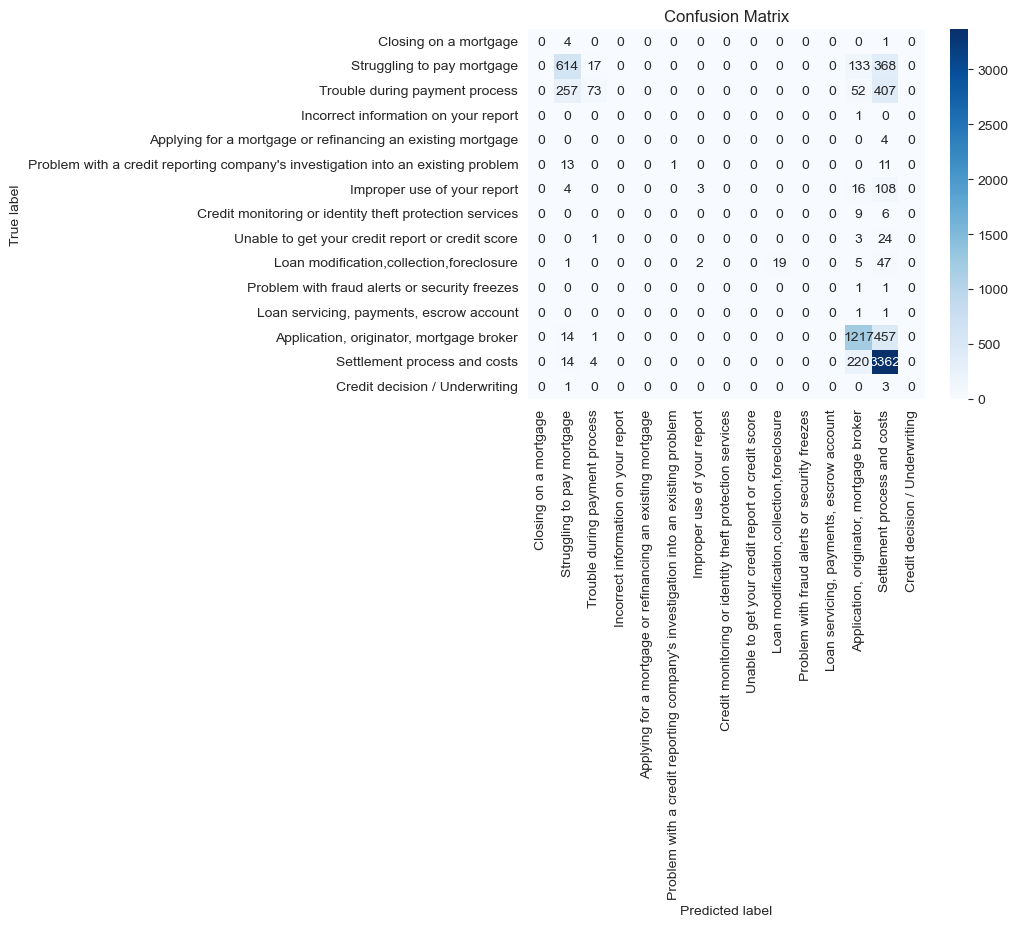

In [23]:
# make predictions on test data using trained model
y_pred = rf_model.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create labels for xticklabels
labels = data['Issue'].unique()
print(labels)

# plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Create a classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose()

# Print the DataFrame
print(df)



                                                    precision    recall  \
Application, originator, mortgage broker             0.000000  0.000000   
Applying for a mortgage or refinancing an exist...   0.665944  0.542403   
Closing on a mortgage                                0.760417  0.092522   
Credit decision / Underwriting                       0.000000  0.000000   
Credit monitoring or identity theft protection ...   0.000000  0.000000   
Improper use of your report                          1.000000  0.040000   
Incorrect information on your report                 0.600000  0.022901   
Loan modification,collection,foreclosure             0.000000  0.000000   
Loan servicing, payments, escrow account             0.000000  0.000000   
Problem with a credit reporting company's inves...   1.000000  0.256757   
Problem with fraud alerts or security freezes        0.000000  0.000000   
Settlement process and costs                         0.000000  0.000000   
Struggling to pay mortgag

C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\larsk\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


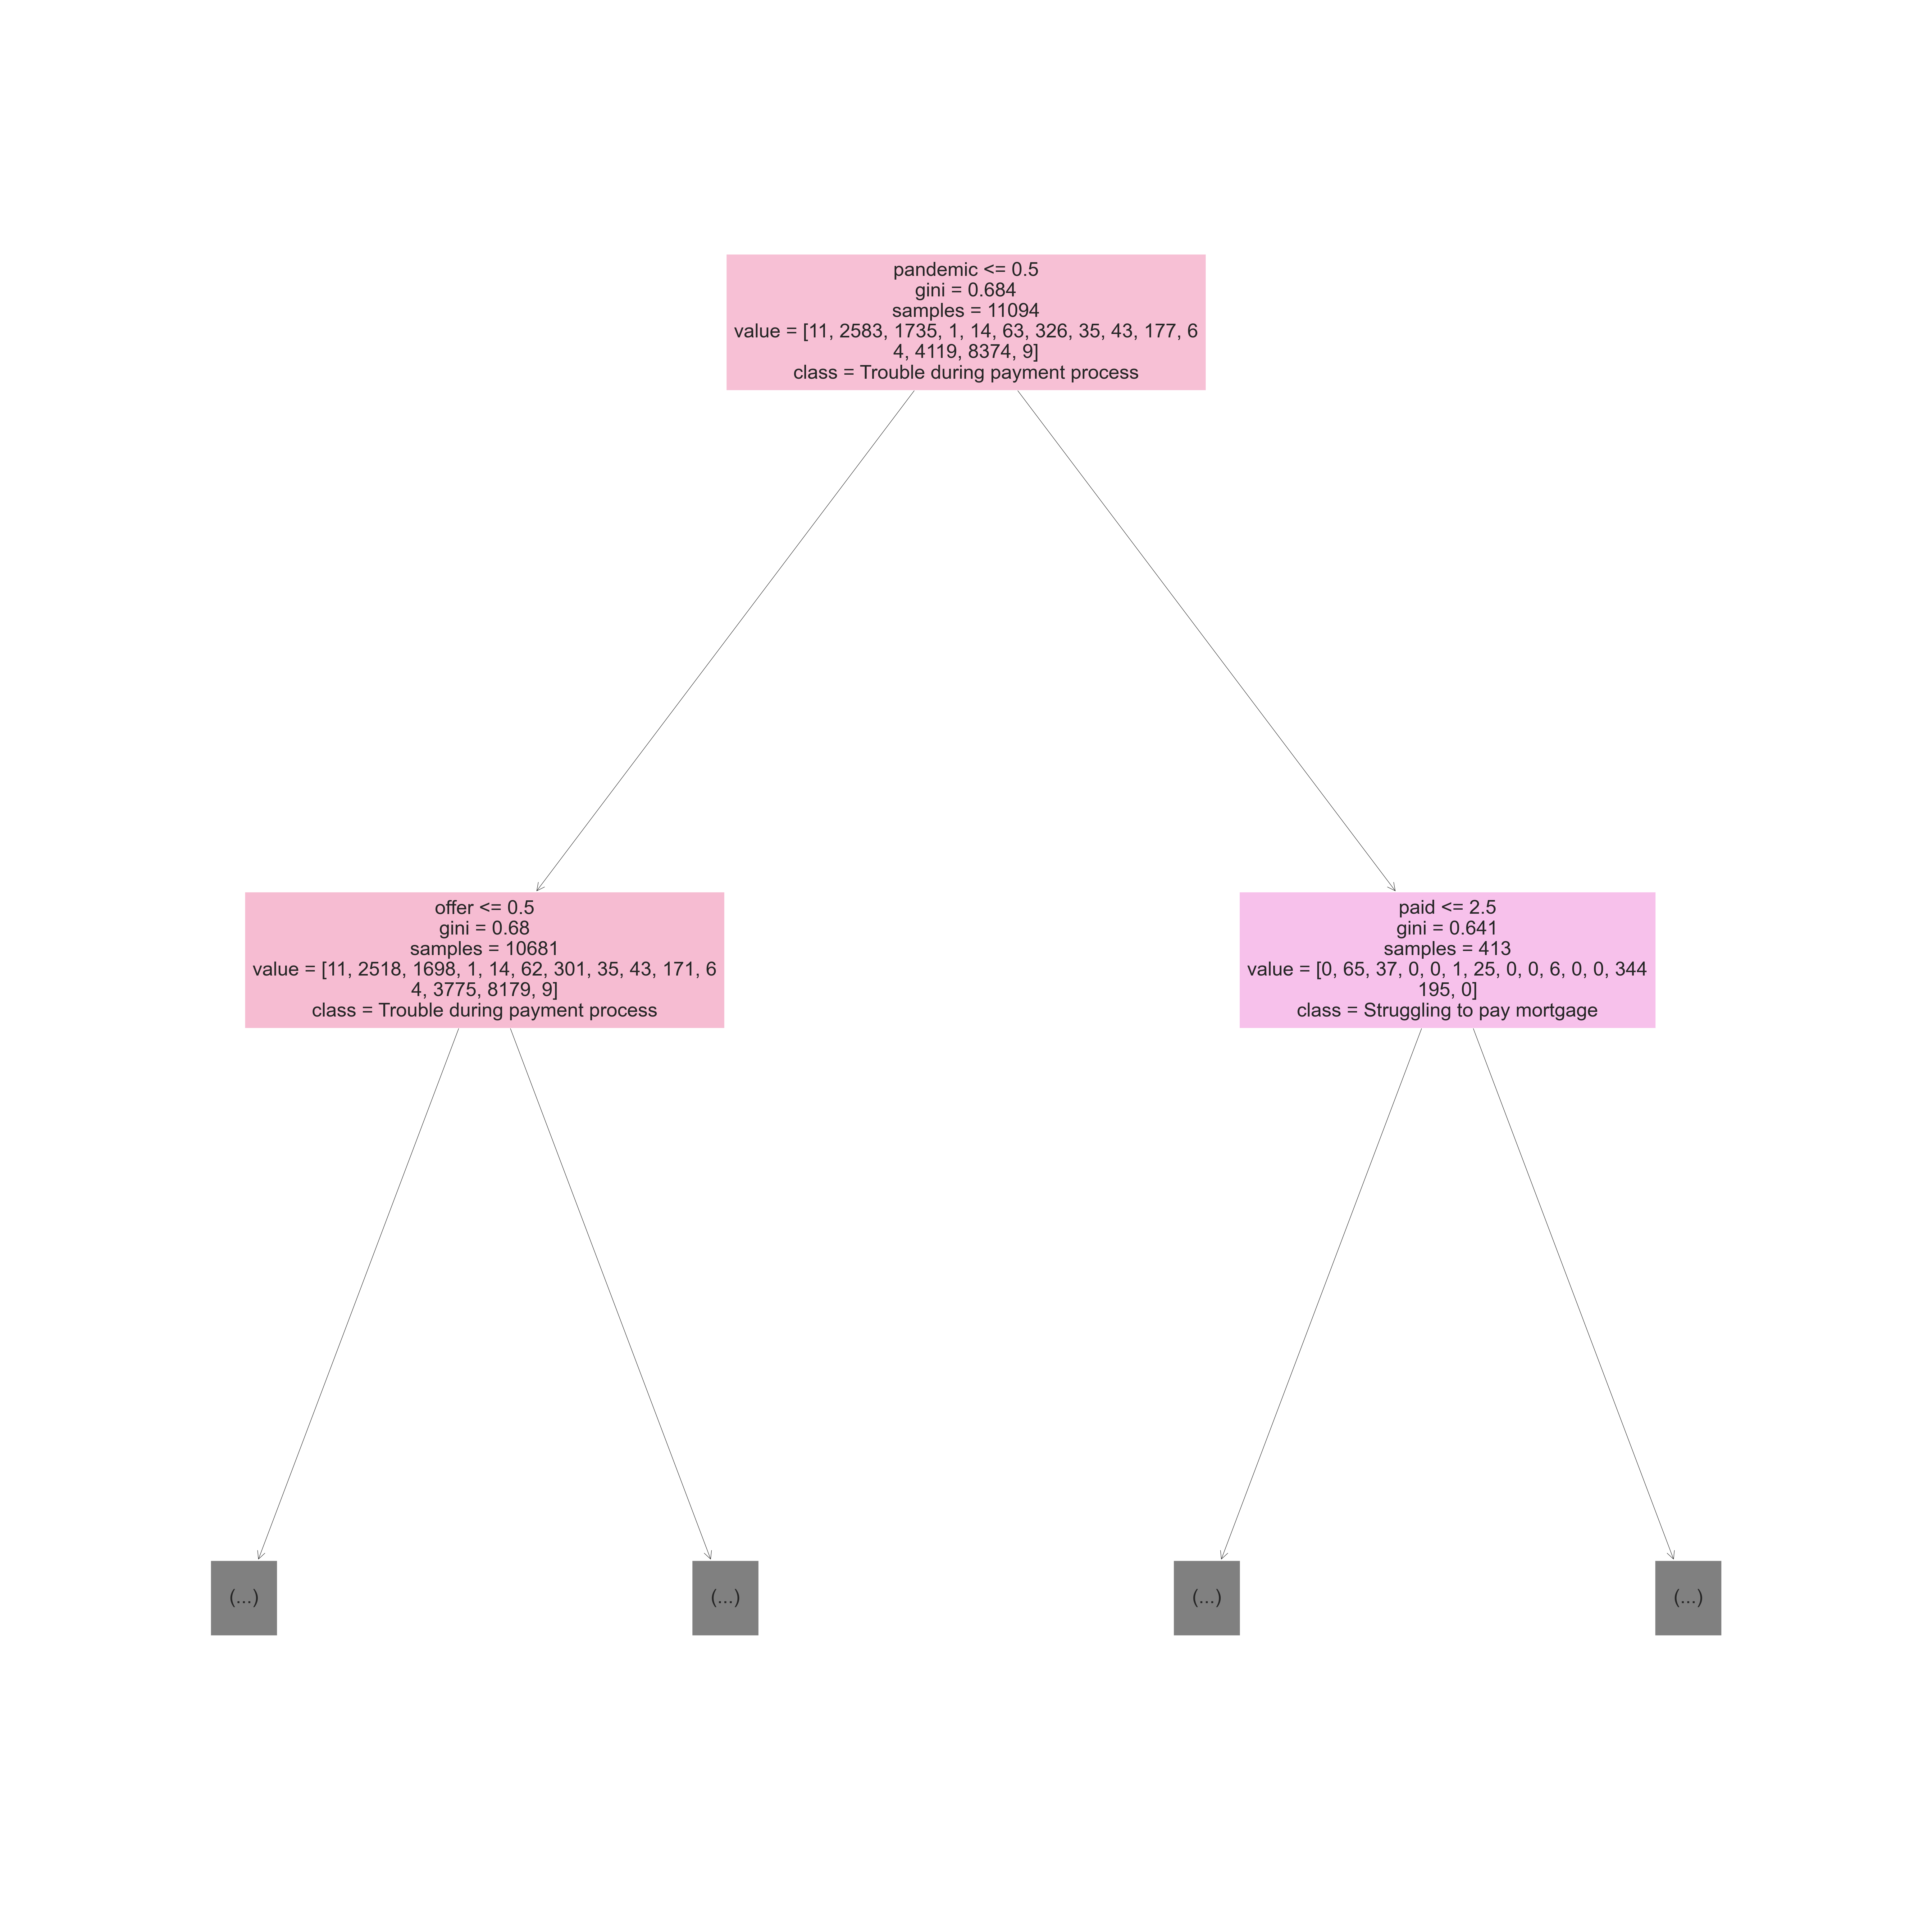

In [26]:
# Visualize the first tree in the Random Forest
plt.figure(figsize=(80, 80))

plot_tree(rf_model.estimators_[0], feature_names=vectorizer.get_feature_names_out(), class_names=rf_model.classes_, filled=True, max_depth=1)
plt.show()


In [27]:
formatted_accuracy = str(int(accuracy*100))
joblib.dump(rf_model, 'rf_model ' + formatted_accuracy + '%.joblib')
print(formatted_accuracy)

70


In [30]:
#Load the saved model from the file
loaded_model = joblib.load('rf_model 70%.joblib')


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words=None)
X = vectorizer.fit_transform(X)

# Define the range of random state values to test
random_states = np.arange(1, 100)

# Initialize variables to store the best random state and its corresponding accuracy
best_random_state = 0
best_accuracy = 0

# Loop over different random state values and calculate the accuracy for each run
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

# Print the best random state and its corresponding accuracy
print('Best random state:', best_random_state)
print('Best accuracy:', best_accuracy)


In [3]:
# Define your features and target
X = data['Consumer complaint narrative']  # text_column is the name of the column in your dataset that contains the text data
y = data['Issue']  # target_column is the name of the column in your dataset that contains the target variable

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize your text data using a bag-of-words approach
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'feature': vectorizer.get_feature_names(), 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the 10 most important features
print(feature_importances.head(10))


KeyboardInterrupt: 